In [1]:
from plotnine import *
import folium # 지도 표현을 위해
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['font.family']='NanumGothicCoding'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.dpi']=300

In [228]:
ef = pd.read_csv('../data/dd/2020.csv')
ef.tail()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s),평균 이슬점온도(°C),평균 상대습도(%),평균 현지기압(hPa),합계 일조시간(hr),평균 전운량(1/10)
13770,295,남해,2020-05-20,16.8,11.3,21.9,NaN,3.4,1.3,11.1,70.3,1005.0,8.9,4.6
13771,295,남해,2020-05-21,15.7,12.7,19.9,NaN,3.2,1.2,11.8,78.5,1010.3,2.4,7.5
13772,295,남해,2020-05-22,16.1,11.3,21.6,NaN,3.8,1.4,11.1,74.5,1009.0,9.4,3.5
13773,295,남해,2020-05-23,17.2,11.7,23.7,NaN,2.5,1.2,12.7,77.0,1007.1,11.7,1.4
13774,295,남해,2020-05-24,19.6,13.0,25.9,0.0,3.8,1.2,15.5,79.1,1005.3,7.2,5.9


In [484]:
np.unique(ef['지점명'])

array(['강릉', '강진군', '강화', '거제', '거창', '경주시', '고산', '고창', '고창군', '고흥',
       '광양시', '광주', '구미', '군산', '금산', '김해시', '남원', '남해', '대관령', '대구',
       '대구(기)', '대전', '동두천', '동해', '목포', '문경', '밀양', '백령도', '보령', '보성군',
       '보은', '부산', '부안', '부여', '북강릉', '북창원', '북춘천', '산청', '삼척', '서산',
       '서울', '성산', '성산포', '수원', '순창군', '순천', '안동', '양산시', '양평', '여수',
       '영광군', '영덕', '영주', '영천', '완도', '울릉도', '울산', '울진', '원주', '의령군',
       '의성', '이천', '인제', '인천', '임실', '장흥', '전주', '정선군', '정읍', '제주', '제천',
       '주암', '진주', '창원', '천안', '철원', '청송군', '청주', '추풍령', '춘천', '충주', '통영',
       '포항', '함양군', '합천', '해남', '홍성', '홍천', '흑산도'], dtype=object)

In [159]:
강원도 = ['강릉','대관령','동해','북강릉','북춘천','삼척','속초','영월','원주','인제',\
      '정선군','철원','춘천','태백','홍천']
전라남도=['강진군','고흥','광양시','목포','무안','보성군','순천','여수','영광군',
           '완도','장흥','주암','진도(첨찰산)','진도군','해남','흑산도']
전라북도 = ['고창','고창군','군산','남원','부안','순창군','임실','장수','전주','정읍']
인천광역시 = ['강화','백령도','인천']
경상남도 = ['거제','거창','김해시','남해','밀양','북창원','산청','양산시','의령군','진주'
        ,'창원','통영','함양군','합천',]
경상북도 = ['경주시','구미','문경','봉화','상주','안동','영덕','영주','영천','울릉도',
        '울진','의성','청송군','포항']
서울특별시 = ['관악산','서울']
부산광역시 =['부산']
대구광역시=['대구','대구(기)']
광주시 =['광주']
대전광역시 = ['대전']
울산광역시=['울산']
경기도=['동두천','수원','양평','이천','파주']
충청북도=['보은','제천','청주','추풍령','충주']
충청남도 = ['금산','보령','부여','서산','천안','홍성']
제주도 = ['고산','서귀포','성산','성산','성산포','제주']
세종시 = ['세종']
한국=[강원도, 전라남도, 전라북도, 인천시, 경상남도, 경상북도, 서울시,부산시,대구시,
   광주시,대전시,울산시,경기도,충청북도,충청남도,제주도,세종시]
한국1=['강원도', '전라남도', '전라북도', '인천광역시', '경상남도', '경상북도', '서울특별시','부산광역시','대구광역시',
   '광주시','대전광역시','울산광역시','경기도','충청북도','충청남도','제주도','세종시']

In [487]:
ef['지역']=''
for i in range(len(한국)):
    for j in range(len(한국[i])):
        ef['지역'][ef['지점명'] == 한국[i][j]]= 한국1[i] 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [488]:
ef_mean = ef.groupby(['지역','일시'], as_index=False).mean()
ef_mean1= ef_mean.iloc[:,0:2]

In [489]:
ef_mean2= ef_mean.iloc[:,4:]
ef_mean = pd.concat([ef_mean1,ef_mean2],axis=1)
ef_mean.tail() #지역을 기준으로 그룹 후 일시를 기준으로 다시 그룹 평균으을 만듬


,지역,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s),평균 현지기압(hPa),평균 상대습도(%),합계 일조시간(hr),합계 일사량(MJ/m2)
245641,충청북도,2019-12-28,-0.80,-6.70,6.85,0.0,1.90,0.50,1010.25,59.35,8.70,10.615
245642,충청북도,2019-12-29,0.75,-3.90,4.00,6.4,2.65,0.95,1007.90,71.30,0.05,3.410
245643,충청북도,2019-12-30,3.10,-1.50,7.10,1.2,6.45,2.10,1004.75,82.25,0.00,2.170
245644,충청북도,2019-12-31,-5.80,-8.25,-1.55,0.0,7.90,4.10,1014.50,50.20,8.80,11.525
245645,충청북도,2020-01-01,-1.70,-7.60,2.20,0.0,4.15,1.90,1013.10,64.90,2.10,5.965


In [35]:
df_weather = pd.read_csv('../data/dd/날씨통합.csv')
df_weather = df_weather.iloc[:,1:]
df_weather.head()

,지역,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),평균 해면기압(hPa),합계 일조시간(hr),평균 전운량(1/10),연도,연월,월
0,강원도,1971-01-01,-0.133333,-4.300000,4.833333,0.0,3.800000,48.700000,1025.333333,7.866667,0.600000,1971,1971-01,1
1,강원도,1971-01-02,-1.900000,-6.033333,4.366667,0.0,2.700000,46.433333,1027.900000,7.200000,0.833333,1971,1971-01,1
2,강원도,1971-01-03,-2.100000,-6.700000,3.066667,1.0,2.566667,57.100000,1021.366667,5.500000,4.933333,1971,1971-01,1
3,강원도,1971-01-04,-6.866667,-11.233333,-1.866667,0.0,5.700000,59.033333,1017.366667,2.866667,7.700000,1971,1971-01,1
4,강원도,1971-01-05,-9.766667,-14.666667,-3.766667,0.0,2.533333,56.266667,1028.233333,8.066667,0.933333,1971,1971-01,1


In [38]:
ef_mean= df_weather[df_weather['지역']=='충청북도']
ef_mean.shape

(18042, 14)

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout
import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import RMSprop
from mpl_toolkits.mplot3d import Axes3D

Using TensorFlow backend.


In [39]:
ef_mean.isnull().sum()

지역              0
일시              0
평균기온(°C)        0
최저기온(°C)        0
최고기온(°C)        0
일강수량(mm)        0
평균 풍속(m/s)      0
평균 상대습도(%)      0
평균 해면기압(hPa)    0
합계 일조시간(hr)     0
평균 전운량(1/10)    0
연도              0
연월              0
월               0
dtype: int64

In [19]:
seq_len =365
result=[]
sequence_length = seq_len+1 # 51번째가 예측값
for index in range(len(ef_mean['평균기온(°C)'])-sequence_length):
    result.append(
        ef_mean['평균기온(°C)'][index:index+sequence_length])
print(len(result))
result =np.array(result)

17131


In [ ]:
seq_len =365
result1=[]
sequence_length = seq_len+1 # 51번째가 예측값
for index in range(len(ef_mean['평균 상대습도(%)'])-sequence_length):
    result1.append(
        ef_mean['평균 상대습도(%)'][index:index+sequence_length])
print(len(result1))
result1 =np.array(result1)

In [20]:
nomalized_data =[]
for window in result:
    # 첫번째 값을 0으로 설정, 즉 자기 자신/ 자기자신-1=0
    # 두번째 값은 두번째 값/ 첫번째 값 -1 = 결과값
    # 계속 진행하면 결과는 정규화된 값을 얻을 수 있다.
    nomalized_window = [((float(p) / 10)) for p in window]
    nomalized_data.append(nomalized_window)
result = np.array(nomalized_data)
result

array([[ 0.46   ,  0.03   ,  0.34   , ...,  0.30625,  0.5075 ,  0.53875],
       [ 0.03   ,  0.34   ,  0.54   , ...,  0.5075 ,  0.53875,  0.1625 ],
       [ 0.34   ,  0.54   ,  0.45   , ...,  0.53875,  0.1625 , -0.40875],
       ...,
       [-0.448  , -0.326  , -0.134  , ...,  0.082  ,  0.058  ,  0.19   ],
       [-0.326  , -0.134  , -0.14   , ...,  0.058  ,  0.19   ,  0.598  ],
       [-0.134  , -0.14   , -0.096  , ...,  0.19   ,  0.598  , -0.264  ]])

In [21]:
row=int(result.shape[0]*0.8)
X_train = result[:row,:365]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
y_train = result[:row,-1]
X_test = result[row:,:365]
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
y_test = result[row:,-1]
X_train.shape, X_test.shape

((13704, 365, 1), (3427, 365, 1))

In [43]:
from keras.models import Sequential
model = Sequential()
model.add(LSTM(128,input_shape=(365,1),return_sequences=True)) 
# 시계열 데이터에서는 LSTM을 사용한다
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(1, activation='linear')) # 답은 하나기 때문 Dense를 사용
model.compile('Adam','mse')
# 단계별로 예측 rmsprop
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 365, 128)          66560     
_________________________________________________________________
lstm_2 (LSTM)                (None, 365, 64)           49408     
_________________________________________________________________
lstm_3 (LSTM)                (None, 365, 64)           33024     
_________________________________________________________________
lstm_4 (LSTM)                (None, 365, 64)           33024     
_________________________________________________________________
lstm_5 (LSTM)                (None, 365, 64)           33024     
_________________________________________________________________
lstm_6 (LSTM)                (None, 365, 64)           33024     
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)               

In [23]:
hist = model.fit(X_train, y_train, epochs=7, validation_data=(X_test, y_test))

Train on 13704 samples, validate on 3427 samples
Epoch 1/7
13704/13704 [==============================] - 1214s 89ms/step - loss: 0.1474 - val_loss: 0.0935
Epoch 2/7
13696/13704 [============================>.] - ETA: 0s - loss: 0.0906

KeyboardInterrupt: 

In [13]:
pred = model.predict(X_test)


In [15]:
model.save('../data/dd/model_경상북도_평균기온_나누기10.h5')

In [ ]:
model.predict(ef_mean['평균기온(°C)'][-180:])

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-

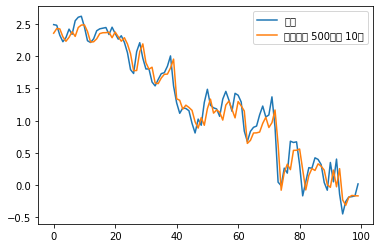

In [14]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(y_test[:100],label='온도')
ax.plot(pred[:100],label="예측온도 500입력 10번")
plt.legend()
plt.show()

In [69]:
n_data_gl = ef_day['최대 풍속(m/s)'].iloc[-20:]
n_data_gl
n_data_gl = np.array(n_data_gl).reshape(1,20,1)
model.predict(n_data_gl)

array([[2.1733332]], dtype=float32)

In [242]:
df1 =df1.reset_index(drop=True)

In [243]:
df1.to_csv('../data/dd/2020data1.csv')

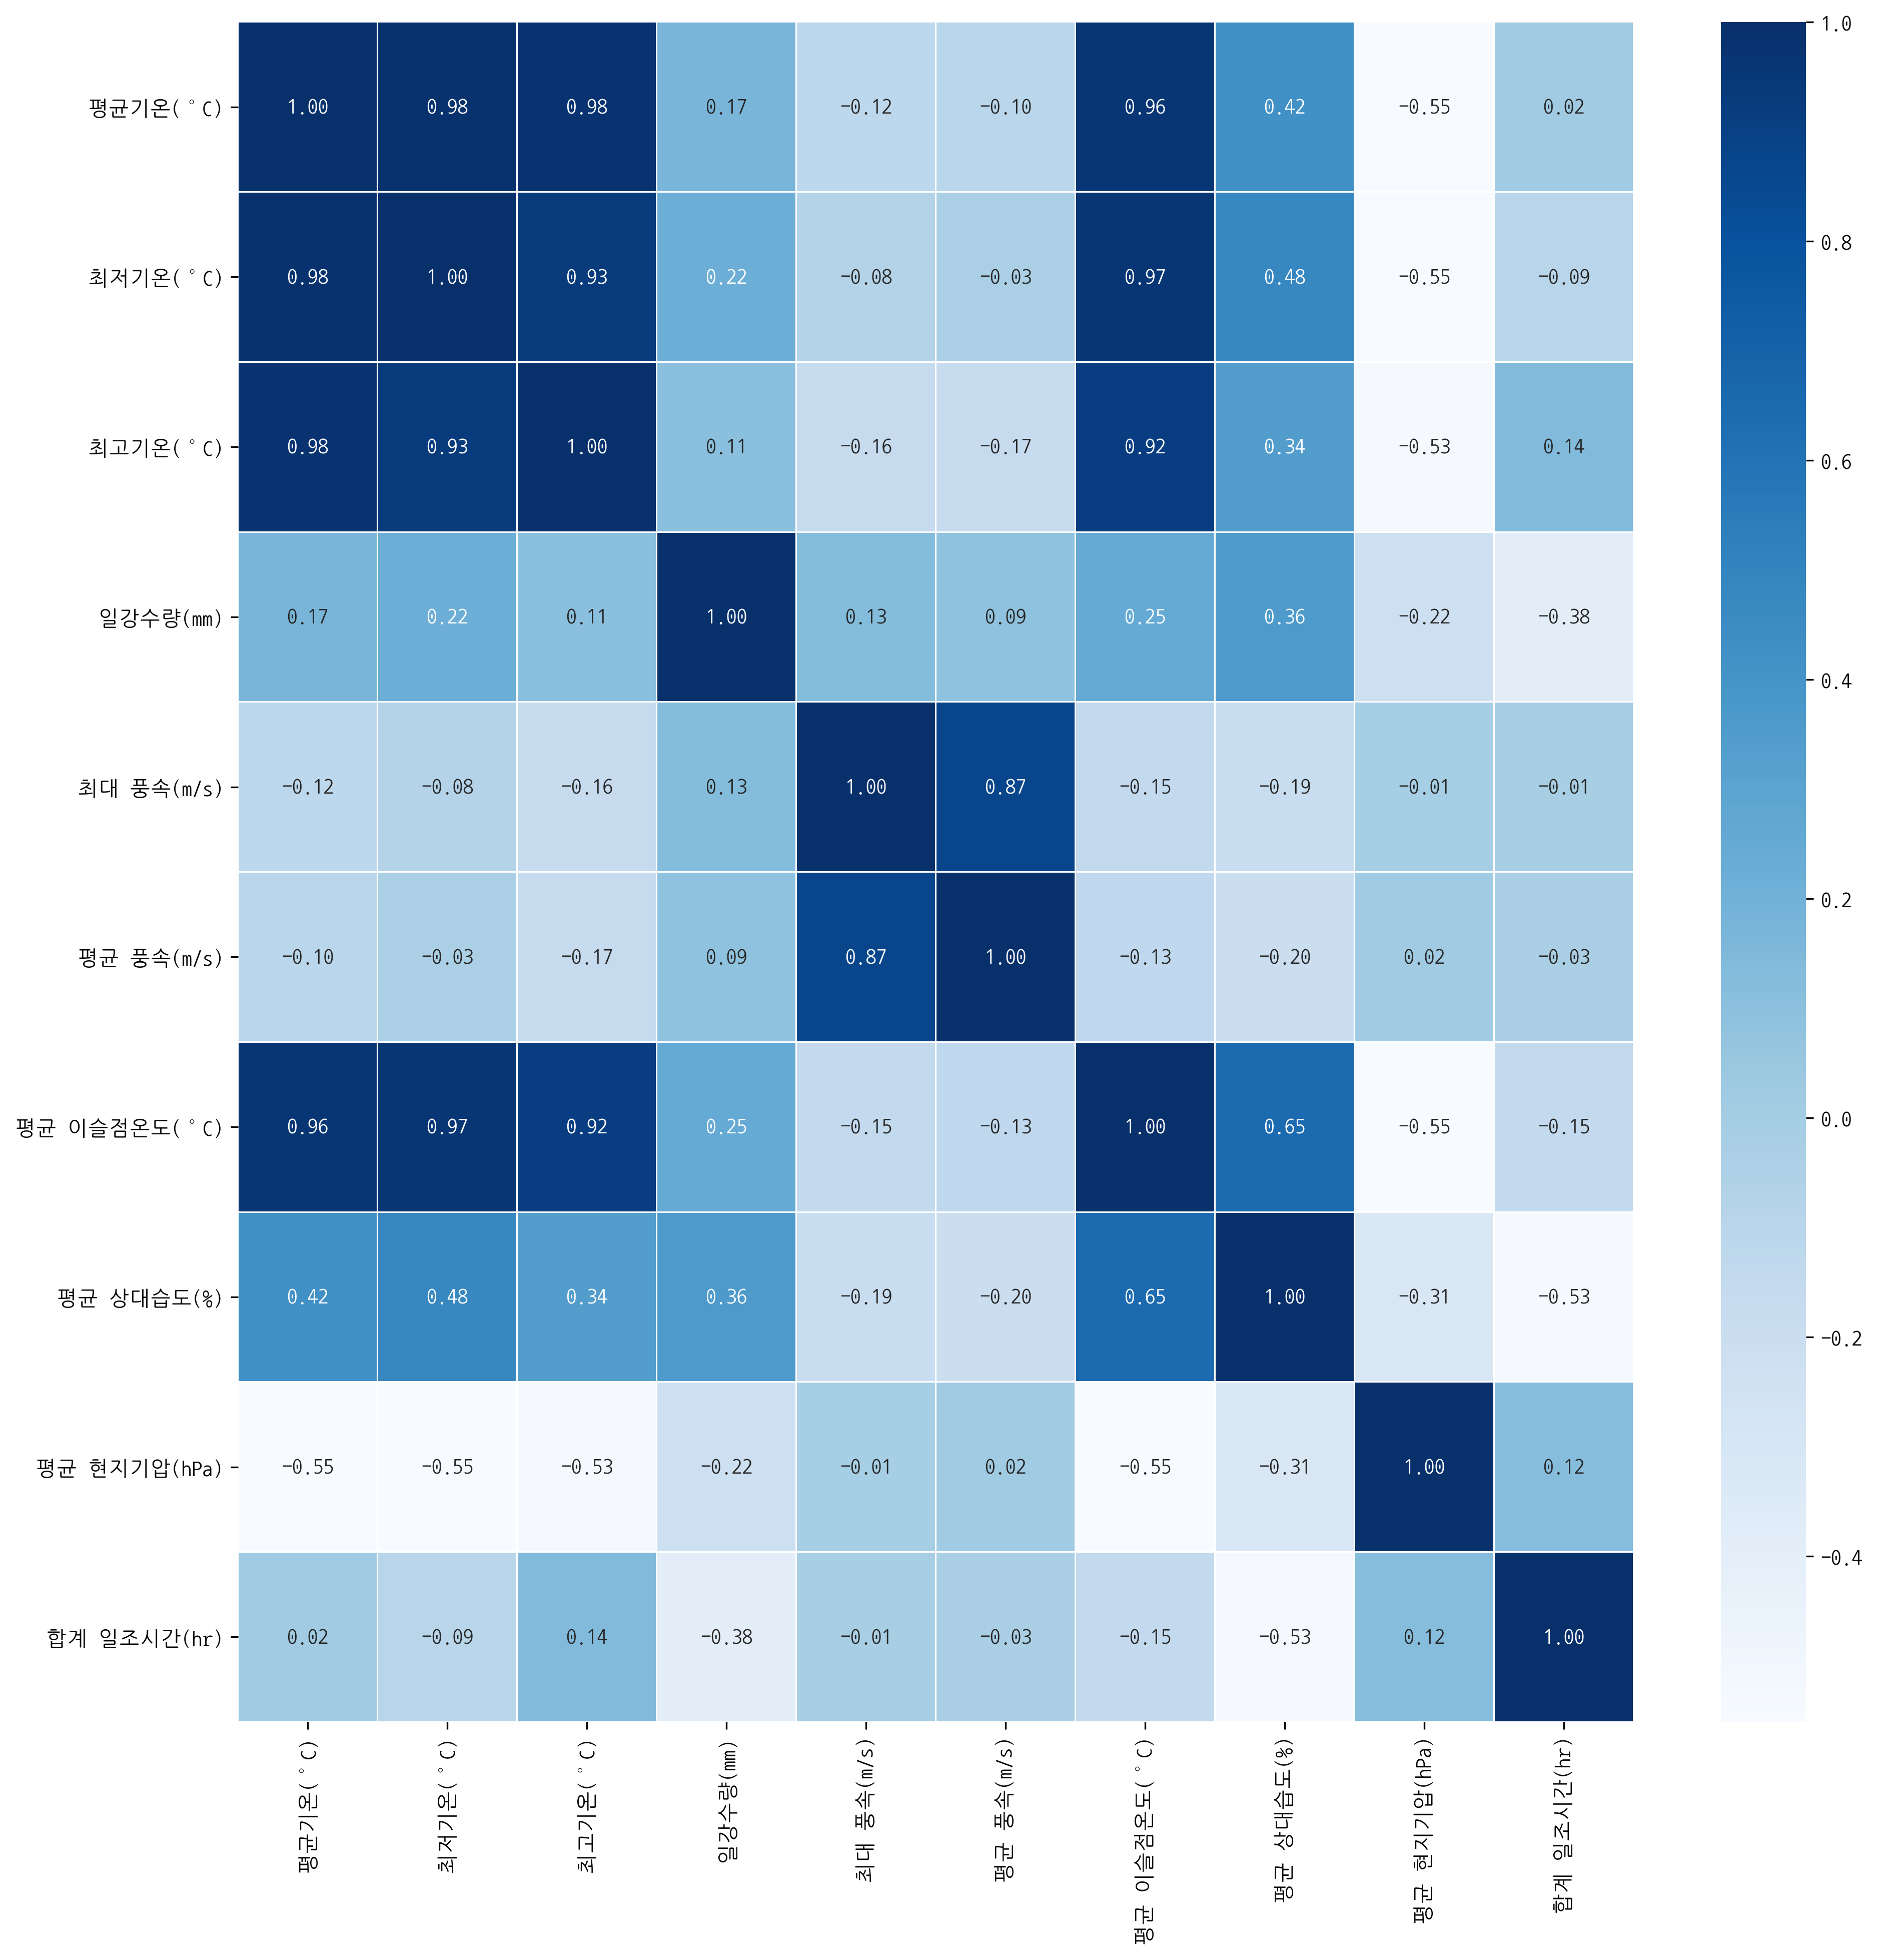

In [124]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data = df1.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [509]:
df2 = df1[df1['지역']=='전라남도']
df2[df2['일시']<='2020-02-01']['평균 상대습도(%)']

1666    61.461538
1667    68.946154
1668    69.984615
1669    72.084615
1670    62.846154
1671    85.084615
1672    91.500000
1673    74.223077
1674    64.546154
1675    65.969231
1676    61.369231
1677    60.569231
1678    61.484615
1679    64.676923
1680    64.115385
1681    51.838462
1682    48.407692
1683    55.908333
1684    70.800000
1685    58.300000
1686    51.738462
1687    86.115385
1688    86.176923
1689    68.069231
1690    77.484615
1691    73.061538
1692    87.800000
1693    80.007692
1694    84.607692
1695    72.553846
1696    68.469231
1697    71.953846
Name: 평균 상대습도(%), dtype: float64

(245646, 12)

In [103]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import re

cropNo=[30595, 30596, 30597, 30598, 30599, 30600, 30601, 30602, 30603, 30604, 30605, 30606
      , 30607, 30608, 30609, 30611, 30612, 30613, 30614, 30615, 30616, 30617, 30618, 30619
      , 30620, 30622, 30623, 30624, 30625, 30626, 30627, 30628, 30629, 30630, 30631
      , 30632, 30633, 30634, 30635, 30636, 30637, 30638, 30639, 30640, 30641, 30642, 30643
      , 30644, 30645, 30646, 30647, 30648, 30651, 30652, 30653, 30654, 30655, 30659, 30661
      , 30669, 30670, 30676, 30677, 30681, 30685, 30686, 30691, 30693, 30694]
d = {}
df = pd.DataFrame()
errorCropNo=[30621]
for i in cropNo:
    url = f'https://www.nongsaro.go.kr/portal/ps/psb/psbl/workScheduleDtl.ps?menuId=PS00087&cntntsNo={i}&sKidofcomdtySeCode=210001&totalSearchYn=Y'
    soup = bs(urlopen(url).read(), 'html.parser')
    temp = soup.find_all('table',({'summary':re.compile('이 표는 학명,')}))[0].text
    crop = soup.select_one('.floatDiv > h1').text
    start = re.compile('생육온도').search(temp).end()
    end = re.compile('재배적지').search(temp).start()
    temp = re.compile('[\w]+\s[\d]+~[\d]+℃|[\w]+\s[\d]+℃')\
                    .findall(temp[start:end])
    d = {}
    d['품종(대분류)']=crop.split('-')[0].strip()
    d['품종(소분류)']=crop.split('-')[1].strip()
    if len(temp) > 0:
        for j in temp:
            z = j.split()
            a = z[1].replace('℃','').split('~')
            if len(a)>1:
                d[z[0]+'(최소)℃']=[int(a[0])]
                d[z[0]+'(최대)℃']=[int(a[1])]
            else:
                d[z[0]+'(최소)℃']=[int(a[0])]
                d[z[0]+'(최대)℃']=[int(a[0])]
        if len(df)==0:
            df = pd.DataFrame(d)
        else:
            df = df.append(pd.DataFrame(d))
            
df = df.dropna(subset=['발아적온(최소)℃'])
for col in df.columns:
    if len(df.loc[df[f'{col}'].isna()])>len(df)//3:
        df=df.drop([f'{col}'],1)
        
df = df.reset_index()
df = df.drop(['index'],1)
df

,품종(대분류),품종(소분류),발아적온(최소)℃,발아적온(최대)℃,생육적온(최소)℃,생육적온(최대)℃,육묘적온(최소)℃,육묘적온(최대)℃
0,채소,갓,25.0,25.0,20.0,20.0,NaN,NaN
1,채소,결구상추,15.0,20.0,15.0,20.0,15.0,23.0
2,채소,고들빼기,25.0,25.0,NaN,NaN,25.0,25.0
3,채소,고추(꽈리고추 반촉성),25.0,32.0,20.0,30.0,22.0,30.0
4,채소,고추(보통재배),25.0,32.0,20.0,30.0,22.0,30.0
5,채소,고추(촉성재배),25.0,32.0,20.0,30.0,22.0,30.0
6,채소,곰취,15.0,21.0,NaN,NaN,15.0,25.0
7,채소,근대,25.0,25.0,NaN,NaN,15.0,18.0
8,채소,냉이,20.0,20.0,15.0,25.0,NaN,NaN
9,채소,당근,15.0,30.0,15.0,20.0,NaN,NaN


In [512]:
df.shape

(51, 8)

In [ ]:
ef_day

In [52]:
import tkinter
from math import *

window=tkinter.Tk()
window.title("12E")
window.geometry("640x480+100+100")
window.resizable(False, False)

def calc(event):
    label.config(text="결과="+str(eval(entry.get())))

entry=tkinter.Entry(window)
entry.bind("<Return>", calc)
entry.insert('df')
entry.pack()

label=tkinter.Label(window)
label.pack()

window.mainloop()

TypeError: insert() missing 1 required positional argument: 'string'

In [74]:
dict = {'firstScore':[100,np.nan,np.nan,95],
       'secondScore':[30,45,56,np.nan],
       'thirdScore':[np.nan,40,80,98]}
df = pd.DataFrame(dict)
df

,firstScore,secondScore,thirdScore
0,100.0,30.0,NaN
1,NaN,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


In [75]:
df.interpolate(method='linear',)

,firstScore,secondScore,thirdScore
0,100.000000,30.0,NaN
1,98.333333,45.0,40.0
2,96.666667,56.0,80.0
3,95.000000,56.0,98.0


In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import re
import urllib.request 
import urllib.parse

In [180]:
url = 'https://www.weather.go.kr/weather/observation/currentweather.jsp?type=t99&mode=0&stn=0&reg=100&auto_man=m&tm=2020.05.26.22:00&dtm=-12'
soup = bs(urlopen(url).read(), 'html.parser')
# temp = soup.find_all('table',({'summary':re.compile('이 표는 학명,')}))[0].text
day = soup.select('table.table_develop3>tbody>tr>td')
# day = soup.select('table.table_develop3>tbody>tr>td')
xx = []
for li in day:
    xx.append(li.string.strip())
len(xx)/13
aa = []
for i in range(int(len(xx)/13)):
    axd=[]
    for k in range(13):
        axd.append(xx[k+i*13])
    aa.append(axd)
today = pd.DataFrame(np.array(aa))
today.columns = ['지점','현재일기','시정km','운량1/10','중하운량','현재기온','이슬점온도'
                 ,'불쾌지수','일강수mm','습도%','풍향','풍속km/h','해면기압']

In [181]:
for i in range(95):
    today['풍속km/h'][i] = today['풍속km/h'].str.split("'")[i][1]

today['풍속km/h'] = today['풍속km/h'].astype('float') * 3.6
today['현재기온'] = today['현재기온'].astype('float')  
today['습도%'] = today['습도%'].astype('float') 
today['해면기압'] = today['해면기압'].astype('float') 
# today['일강수mm'] = today['일강수mm'].astype('float') 


In [211]:
today.groupby('지역').mean().head()
# today['현재기온','운량1/10','습도%','풍속','해면기압']

,현재기온,습도%,풍속km/h,해면기압
지역,,,,
강원도,18.942857,69.500000,4.911429,1008.842857
경기도,16.540000,84.200000,4.104000,1010.700000
경상남도,19.371429,69.428571,2.314286,1009.828571
경상북도,20.364286,65.285714,5.502857,1009.007143
광주시,16.800000,94.000000,4.320000,1010.800000


In [186]:
today.sort_values(by=['지역'])
for i in np.unique(today['지역']):
    for k in range(len(today[today['지역']==i])):
        today['운량1/10'] = today[today['지역'].str.contains('')]['운량']

,지점,현재일기,시정km,운량1/10,중하운량,현재기온,이슬점온도,불쾌지수,일강수mm,습도%,풍향,풍속km/h,해면기압,지역
0,강릉,,20 이상,,,22.8,11.5,69,,49,남서,4.68,1007.9,강원도
93,홍천,,7.7,,,17.5,13.6,63,,78,북서,4.68,1010.0,강원도
44,속초,,20 이상,,,22.9,13.3,69,,55,동남동,5.40,1007.5,강원도
65,인제,,5.1,,,17.5,13.6,63,,78,남남동,8.64,1009.8,강원도
36,북춘천,박무,4.0,10,10,17.7,14.5,63,,82,북북동,2.52,1009.9,강원도
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,추풍령,,9.7,,,19.2,12.4,65,,65,서남서,13.32,1008.7,충청북도
29,보은,,14.6,,,19.4,12.1,65,,63,남남서,3.60,1009.4,충청북도
74,제천,,3.3,,,17.5,13.2,63,,76,서북서,2.16,1009.7,충청북도
84,충주,,2.8,,,16.8,13.8,62,,83,서북서,2.16,1010.2,충청북도


In [214]:
url = 'https://www.weather.go.kr/weather/observation/currentweather.jsp?type=t99&mode=0&stn=0&reg=100&auto_man=m&tm=2020.05.26.22:00&dtm=-12'
soup = bs(urlopen(url).read(), 'html.parser')
# temp = soup.find_all('table',({'summary':re.compile('이 표는 학명,')}))[0].text
day = soup.select('table.table_develop3>tbody>tr>td')

,지점,현재일기,시정km,운량1/10,중하운량,현재기온,이슬점온도,불쾌지수,일강수mm,습도%,풍향,풍속km/h,해면기압,지역
41,서울,박무,4.9,5,0,17.9,13.3,63,,75.0,북,8.28,1010.0,서울특별시


In [4]:
from selenium import webdriver
import time
import datetime
USER = 'rkdansrn2005@naver.com'
PASS = '!@zkmg6368'

# driver = webdriver.PhantomJS(executable_path='./phantomjs/bin/phantomjs')
browser = webdriver.Chrome('D:/kangmoonku/html5/python/chromedriver.exe')
# 시간지연 10초대기 : 화면을 캡쳐하기 위한 대기시간 설정
browser.implicitly_wait(2)

start_url = 'https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36'
browser.get(start_url)
browser.implicitly_wait(2)

# # 텍스트박스에 아이디와 비밀번호 입력하기
browser.find_element_by_xpath('//*[@id="dataFormCd"]/option[2]').click()
browser.find_element_by_xpath('//*[@id="ztree_1_check"]').click()
# 선택자
browser.find_element_by_xpath('//*[@id="ztree1_3_check"]').click()
browser.find_element_by_xpath('//*[@id="ztree1_4_check"]').click()
browser.find_element_by_xpath('//*[@id="ztree1_6_check"]').click()
browser.find_element_by_xpath('//*[@id="ztree1_14_check"]').click()
browser.find_element_by_xpath('//*[@id="ztree1_22_check"]').click()
browser.find_element_by_xpath('//*[@id="ztree1_29_check"]').click()
browser.find_element_by_xpath('//*[@id="ztree1_37_check"]').click()
browser.find_element_by_xpath('//*[@id="ztree1_40_check"]').click()
browser.find_element_by_xpath('//*[@id="ztree1_51_check"]').click()

browser.implicitly_wait(2)
# 로그인 화면 
browser.find_element_by_xpath('//*[@id="content"]/div[3]/div[5]/div/a[1]').click()
#입력
browser.find_element_by_name('_loginId').send_keys(USER)
browser.find_element_by_name('_passwordNo').send_keys(PASS)
time.sleep(3)
browser.find_element_by_xpath('//*[@id="wrap-datapop"]/div/div[3]/div[1]/input').click()
time.sleep(2)
# csv 다운
browser.find_element_by_xpath('//*[@id="content"]/div[3]/div[5]/div/a[1]').click()

time.sleep(2)
# 목적 선택
browser.find_element_by_xpath('/html/body/div[8]/div/div/div[2]/form/ul/li[3]/input[3]').click()

# 다운로드
browser.find_element_by_xpath('/html/body/div[8]/div/div/div[2]/div/input[2]').click()

# 파일이 받아지기까지 지연시간
time.sleep(2)

now = datetime.datetime.now()
for i in range(120):
    k=str(now+datetime.timedelta(seconds=-50+i))
    k = k.replace('-',"").replace(' ',"").replace(':',"").split('.')[0]
#     print(k)
    try:
        df_a = pd.read_csv(r'C:\Users\TJ\Downloads\OBS_ASOS_DD_%s.csv' %k, engine='python')
        a=2
    except:
        a=1
    if a==1:
        pass
    else:
        df_a = pd.read_csv(r'C:\Users\TJ\Downloads\OBS_ASOS_DD_%s.csv' %k, engine='python')
        break
        
browser.close()
   

20200528150012
20200528150013
20200528150014
20200528150015
20200528150016
20200528150017
20200528150018
20200528150019
20200528150020
20200528150021
20200528150022
20200528150023
20200528150024
20200528150025
20200528150026
20200528150027
20200528150028
20200528150029
20200528150030
20200528150031
20200528150032
20200528150033
20200528150034
20200528150035
20200528150036
20200528150037
20200528150038
20200528150039
20200528150040
20200528150041
20200528150042
20200528150043
20200528150044
20200528150045
20200528150046
20200528150047
20200528150048
20200528150049
20200528150050
20200528150051
20200528150052
20200528150053
20200528150054
20200528150055
20200528150056


In [6]:
강원도 = ['강릉','대관령','동해','북강릉','북춘천','삼척','속초','영월','원주','인제',\
      '정선군','철원','춘천','태백','홍천']
전라남도=['강진군','고흥','광양시','목포','무안','보성군','순천','여수','영광군',
           '완도','장흥','주암','진도(첨찰산)','진도군','해남','흑산도']
전라북도 = ['고창','고창군','군산','남원','부안','순창군','임실','장수','전주','정읍']
인천광역시 = ['강화','백령도','인천']
경상남도 = ['거제','거창','김해시','남해','밀양','북창원','산청','양산시','의령군','진주'
        ,'창원','통영','함양군','합천',]
경상북도 = ['경주시','구미','문경','봉화','상주','안동','영덕','영주','영천','울릉도',
        '울진','의성','청송군','포항']
서울특별시 = ['관악산','서울']
부산광역시 =['부산']
대구광역시=['대구','대구(기)']
광주시 =['광주']
대전광역시 = ['대전']
울산광역시=['울산']
경기도=['동두천','수원','양평','이천','파주']
충청북도=['보은','제천','청주','추풍령','충주']
충청남도 = ['금산','보령','부여','서산','천안','홍성']
제주도 = ['고산','서귀포','성산','성산','성산포','제주']
세종시 = ['세종']
한국=[강원도, 전라남도, 전라북도, 인천광역시, 경상남도, 경상북도, 서울특별시,부산광역시,대구광역시,
   광주시,대전광역시,울산광역시,경기도,충청북도,충청남도,제주도,세종시]
한국1=['강원도', '전라남도', '전라북도', '인천광역시', '경상남도', '경상북도', '서울특별시','부산광역시','대구광역시',
   '광주시','대전광역시','울산광역시','경기도','충청북도','충청남도','제주도','세종시']

In [5]:
now1 = datetime.datetime.now()
yesterday = datetime.date.today() - datetime.timedelta(1)
df = df_a[df_a['일시']=='%s' %yesterday]
df['일강수량(mm)'] = df['일강수량(mm)'].fillna(0)
df = df.interpolate(method='linear',)

In [7]:
df['지역']=''
for i in range(len(한국)):
    for j in range(len(한국[i])):
        df['지역'][df['지점명'] == 한국[i][j]]= 한국1[i] 
df = df.iloc[:,1:]

In [12]:
df_mean = df.groupby(['지역','일시'], as_index=False).mean()
df_mean.reset_index(drop=True)

df_mean['연도'] , df_mean['연월'] ,df_mean['월'] ="","",""
df_mean['연도'] = df_mean['일시'].str.slice(start=0, stop=4)
df_mean['연월'] = df_mean['일시'].str.slice(start=0, stop=7)
df_mean['월'] = df_mean['일시'].str.slice(start=6, stop=7)
df_mean['연도'] = df_mean['연도'].astype(int)
df_mean['월'] = df_mean['월'].astype(int)
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역            17 non-null     object 
 1   일시            17 non-null     object 
 2   평균기온(°C)      17 non-null     float64
 3   최저기온(°C)      17 non-null     float64
 4   최고기온(°C)      17 non-null     float64
 5   일강수량(mm)      17 non-null     float64
 6   평균 풍속(m/s)    17 non-null     float64
 7   평균 상대습도(%)    17 non-null     float64
 8   평균 해면기압(hPa)  17 non-null     float64
 9   합계 일조시간(hr)   17 non-null     float64
 10  평균 전운량(1/10)  17 non-null     float64
 11  연도            17 non-null     int32  
 12  연월            17 non-null     object 
 13  월             17 non-null     int32  
dtypes: float64(9), int32(2), object(3)
memory usage: 1.9+ KB


In [66]:
import pymysql
conn = pymysql.connect(host='localhost',port=3306,user='mk_database',passwd='12345',\
                       db='weather_data',charset='utf8')
curs=conn.cursor()

In [67]:
for i in list(np.unique(aa['지역'])):
    sql = """
    create table weather_%s(
    지역 varchar(20),
    일시 varchar(30),
    평균기온 double,
    최저기온 double,
    최고기온 double,
    일강수량 double,
    평균풍속 double,
    평균상대습도 double,
    평균해면기압 double,
    일조시간 double,
    평균전운량 double
    ) """ % i
    curs.execute(sql)
conn.commit()
conn.close()

In [51]:
aa= pd.read_csv('ex/날씨통합.csv')
aa = aa.iloc[:,1:]
aa = aa.dropna()

In [57]:
aa = aa.iloc[:,:-3]

In [64]:
aa['지역']

0          강원도
1          강원도
2          강원도
3          강원도
4          강원도
          ... 
289027    충청북도
289028    충청북도
289029    충청북도
289030    충청북도
289031    충청북도
Name: 지역, Length: 288698, dtype: object

In [69]:
import pymysql
conn = pymysql.connect(host='localhost',port=3306,user='mk_database',passwd='12345',\
                       db='weather_data',charset='utf8')
curs=conn.cursor()

In [70]:
for k in list(np.unique(aa['지역'])):
    aa1 = aa[aa['지역']=='%s' %k]
    for i in range(aa1.shape[0]):    
        sql = 'insert into weather_%s ' % k \
        +'(지역,일시,평균기온,최저기온,최고기온,일강수량,평균풍속,평균상대습도,평균해면기압,일조시간,평균전운량) values \
        ("%s","%s",%f,%f,%f,%f,%f,%f,%f,%f,%f)' %(aa1.iloc[i,0],aa1.iloc[i,1],aa1.iloc[i,2],aa1.iloc[i,3],aa1.iloc[i,4],aa1.iloc[i,5],aa1.iloc[i,6],aa1.iloc[i,7],aa1.iloc[i,8],aa1.iloc[i,9],aa1.iloc[i,10])
        curs.execute(sql)

In [71]:
conn.commit()

conn.close()